In [1]:
from google.colab import files
uploaded = files.upload()

Saving Amazon.zip to Amazon.zip



# Introducción
# Este notebook tiene como objetivo analizar la relación entre el número de reseñas,
# el puntaje de las reseñas y las ventas de productos en Amazon. El análisis pretende
# explorar si existe una correlación significativa entre estos factores para orientar
# futuras estrategias comerciales.


In [2]:

# Formulación de hipótesis
# Hipótesis 1: Existe una correlación positiva entre el número de reseñas y las ventas de productos.
# Hipótesis 2: Los productos con un puntaje de reseña más alto tienden a tener un mayor volumen de ventas.
# Hipótesis 3: Las reseñas de sentimiento positivo correlacionan con un aumento en las ventas.

# Vamos a analizar estas hipótesis utilizando técnicas de análisis de datos y visualización.


In [3]:

# Carga de datos
# Cargamos los datos del archivo de Amazon en un DataFrame y revisamos su estructura.

import pandas as pd

# Cargar datos desde el archivo comprimido
df = pd.read_csv('Amazon.zip', compression='zip')

# Mostrar las primeras filas para entender la estructura
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [4]:
from textblob import TextBlob

# Analiza el sentimiento de las primeras 5 reseñas
sentiments = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(sentiments.head())

0    0.200259
1    0.159591
2    0.420833
3    0.148821
4    0.267086
Name: reviews.text, dtype: float64


In [5]:
# Cargamos el dataset en un DataFrame de Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('Amazon.zip')


# **Análisis de Reseñas de Productos en Amazon**

## **Contexto del problema**
Hoy en día, los marketplaces como **Amazon** reciben millones de reseñas de productos, las cuales influyen en la toma de decisiones de los consumidores. Comprender estas reseñas permite a las empresas mejorar productos, ajustar estrategias de venta, y optimizar la experiencia del cliente. Sin embargo, analizar grandes volúmenes de datos manualmente es ineficiente.

## **Objetivo del proyecto**
Nuestro objetivo es **predecir la valoración general (rating) de un producto** a partir de las características extraídas de las reseñas (como el texto, la cantidad de comentarios útiles o el número de votos). La variable objetivo será, por tanto, el **rating**, y trabajaremos con un enfoque de **clasificación supervisada**.

## **Situación de negocio**
Amazon necesita identificar patrones que lleven a valoraciones bajas o altas para:
1. **Identificar productos mal valorados** y optimizar su oferta.
2. **Mejorar recomendaciones de productos** para diferentes segmentos de clientes.
3. **Automatizar la evaluación** de reseñas en función de ciertos patrones.

---

## **Estructura del Notebook**

### **1. Carga del Dataset**
Se descarga el dataset de Kaggle, se descomprime y se carga en un DataFrame de Pandas para su análisis.

### **2. Análisis Exploratorio**
Se exploran las primeras filas del dataset y se evalúa la existencia de valores nulos.
* Si los nulos representan menos del 5% del total, se eliminan.
* Si superan ese porcentaje, se considerará la imputación.

### **3. Visualización de Datos**
Se emplean gráficos para comprender la distribución de los ratings y detectar posibles outliers.

### **4. Preprocesamiento de Datos**
Se toman medidas para eliminar o imputar valores nulos según corresponda.

### **5. Modelado Predictivo**
Se selecciona un modelo supervisado para predecir el **rating** y se evalúa su desempeño.


In [6]:
# Instalamos la librería kaggle para descargar datasets
!pip install kaggle


In [7]:
# Descargamos el dataset de reseñas desde Kaggle
!kaggle datasets download -d arhamrumi/amazon-product-reviews

Dataset URL: https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews
License(s): CC0-1.0
 93% 107M/115M [00:00<00:00, 129MB/s] 
100% 115M/115M [00:00<00:00, 134MB/s]


In [8]:
# Descomprimimos el archivo zip para acceder a los datos
!unzip Amazon.zip

Archive:  Amazon.zip
  inflating: 7817_1.csv              


In [9]:
print(df.shape)


(1597, 27)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

**reviewerID / customer_id**

Descripción: Identificador único del cliente que dejó la reseña.
Relevancia: Permite analizar hábitos de compra o tendencias de usuarios frecuentes.

**productID / asin **

Descripción: Identificador del producto reseñado.
Relevancia: Es clave para agrupar reseñas por producto y detectar qué productos son más populares o problemáticos.

**rating / overall (de 1 a 5)**

Descripción: Calificación numérica otorgada por el usuario.
Relevancia: Útil para análisis de opiniones, puntuaciones promedio y modelos de recomendación.
Análisis potencial: Distribución de calificaciones, identificación de productos con alta/ baja aceptación.

**review_text / review_body**

Descripción: Contenido textual de la reseña.
Relevancia: Ideal para minería de texto y análisis de sentimientos, identificando emociones o temas frecuentes.

**review_date / timestamp**

Descripción: Fecha de publicación de la reseña.
Relevancia: Permite evaluar cómo cambia la percepción del producto con el tiempo o realizar análisis estacionales.

**verified_purchase**

Descripción: Indica si la compra fue verificada.
Relevancia: Garantiza la autenticidad de la reseña, relevante para evaluar la fiabilidad de las opiniones.

**category / product_category**

Descripción: Categoría del producto (por ejemplo, "Electrónica", "Libros", etc.).
Relevancia: Permite segmentar análisis por industria o tipo de producto.

**helpful_votes / helpful**

Descripción: Número de votos indicando que la reseña fue útil para otros usuarios.
Relevancia: Identifica reseñas de alta calidad y usuarios influyentes en la plataforma.

**price**

Descripción: Precio del producto al momento de la compra.
Relevancia: Se puede correlacionar con la satisfacción del cliente o detectar patrones de precios y valor percibido.

**brand / manufacturer**

Descripción: Marca o fabricante del producto.
Relevancia: Sirve para evaluar la percepción de marcas específicas en el mercado.


In [11]:
# Resumen estadístico: incluye media, desviación estándar, mínimos y máximos
print(df.describe())

                ean  reviews.numHelpful  reviews.rating  reviews.userCity  \
count  8.980000e+02          900.000000     1177.000000               0.0   
mean   8.443135e+11           83.584444        4.359388               NaN   
std    3.416444e+09          197.150238        1.021445               NaN   
min    8.416670e+11            0.000000        1.000000               NaN   
25%    8.416670e+11            0.000000        4.000000               NaN   
50%    8.416670e+11            0.000000        5.000000               NaN   
75%    8.487190e+11           34.000000        5.000000               NaN   
max    8.487190e+11          997.000000        5.000000               NaN   

       reviews.userProvince  sizes           upc  
count                   0.0    0.0  8.980000e+02  
mean                    NaN    NaN  8.443135e+11  
std                     NaN    NaN  3.416444e+09  
min                     NaN    NaN  8.416670e+11  
25%                     NaN    NaN  8.416670e+11  


In [12]:
print(df.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


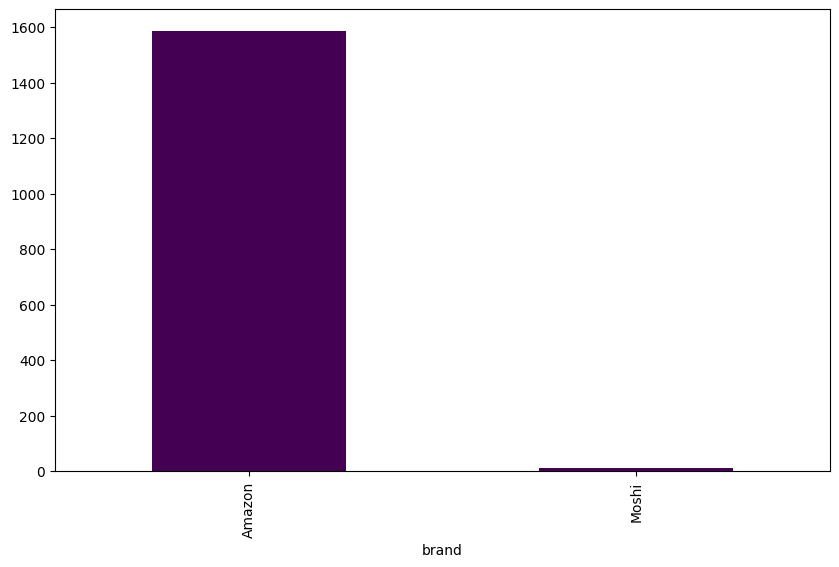

Axes(0.125,0.11;0.775x0.77)


In [13]:
brand_counts = df['brand'].value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()
print(brand_counts)

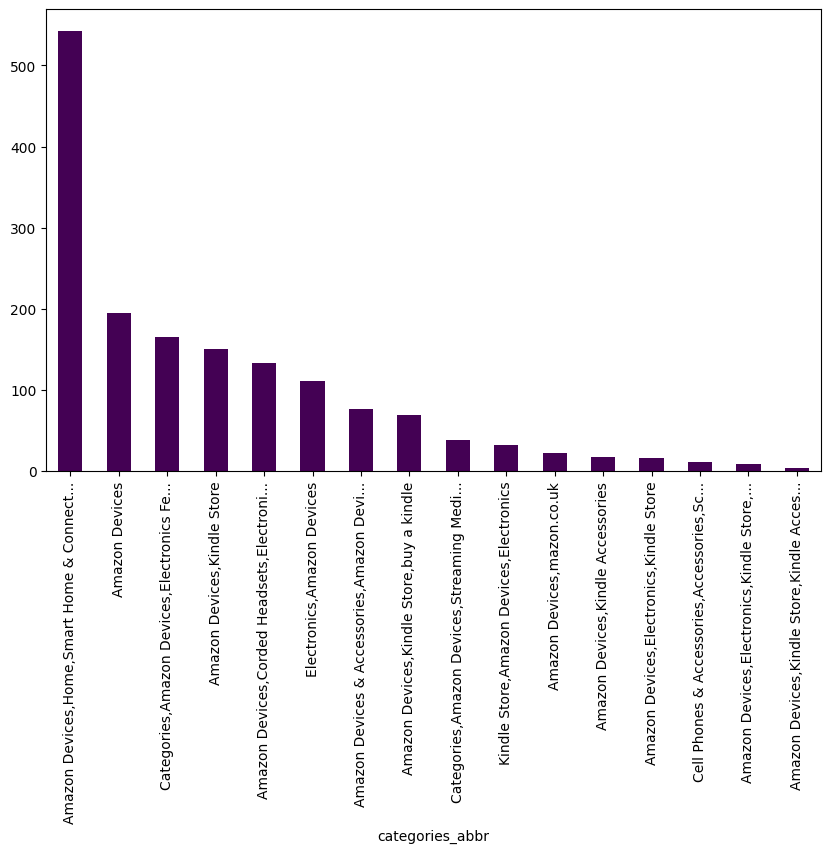

categories_abbr
Amazon Devices,Home,Smart Home & Connect...    542
Amazon Devices                                 195
Categories,Amazon Devices,Electronics Fe...    166
Amazon Devices,Kindle Store                    151
Amazon Devices,Corded Headsets,Electroni...    133
Electronics,Amazon Devices                     111
Amazon Devices & Accessories,Amazon Devi...     77
Amazon Devices,Kindle Store,buy a kindle        70
Categories,Amazon Devices,Streaming Medi...     38
Kindle Store,Amazon Devices,Electronics         32
Amazon Devices,mazon.co.uk                      23
Amazon Devices,Kindle Accessories               18
Amazon Devices,Electronics,Kindle Store         16
Cell Phones & Accessories,Accessories,Sc...     12
Amazon Devices,Electronics,Kindle Store,...      9
Amazon Devices,Kindle Store,Kindle Acces...      4
Name: count, dtype: int64


In [19]:
# Crear columna auxiliar con nombres de categorías recortados a un máximo de 40 caracteres
df['categories_abbr'] = df['categories'].apply(lambda x: x[:40] + '...' if len(x) > 40 else x)

# Contar y graficar las categorías abreviadas
category_counts = df['categories_abbr'].value_counts()
category_counts.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()

# Imprimir los conteos para referencia
print(category_counts)


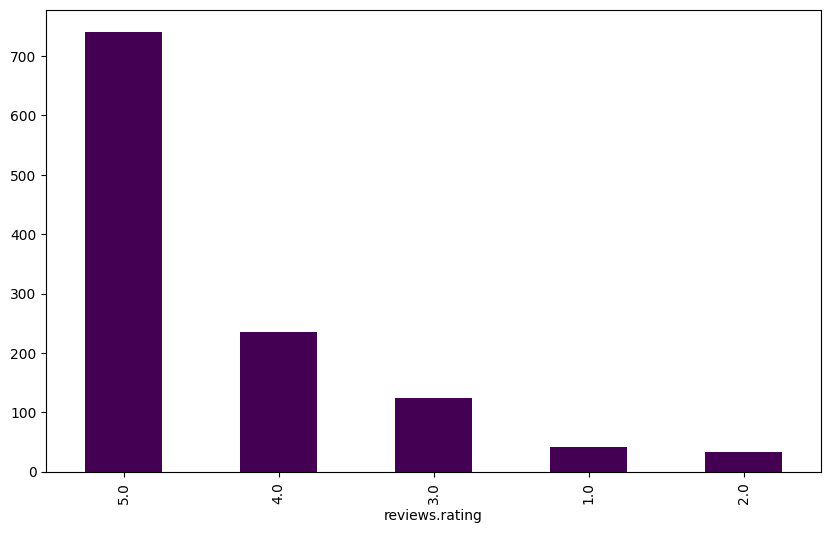

Axes(0.125,0.11;0.775x0.77)


In [15]:
rating_counts = df['reviews.rating'].value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()
print(rating_counts)

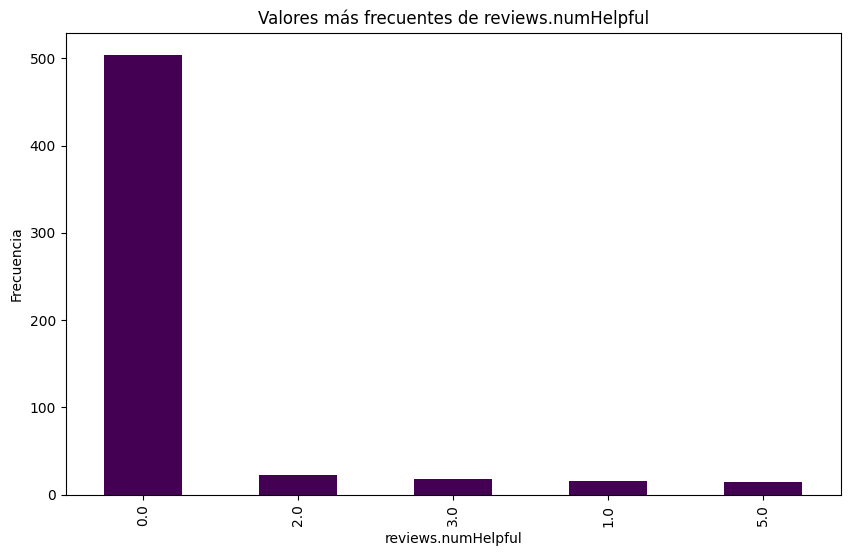

In [16]:
# Filtrar valores que aparecen más de 10 veces
helpful_counts = df['reviews.numHelpful'].value_counts()
filtered_counts = helpful_counts[helpful_counts > 10]

# Graficar solo los valores más frecuentes
filtered_counts.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.xlabel("reviews.numHelpful")
plt.ylabel("Frecuencia")
plt.title("Valores más frecuentes de reviews.numHelpful")
plt.show()


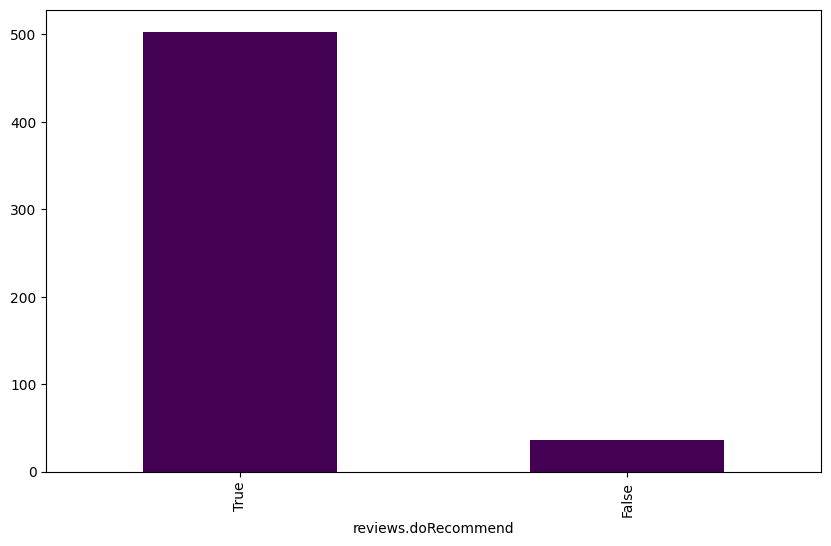

Axes(0.125,0.11;0.775x0.77)


In [17]:
recommendation_counts = df['reviews.doRecommend'].value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()
print(recommendation_counts)

<ipython-input-18-818261dae300>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reviews_per_month = df['dateAdded'].dt.to_period('M').value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")


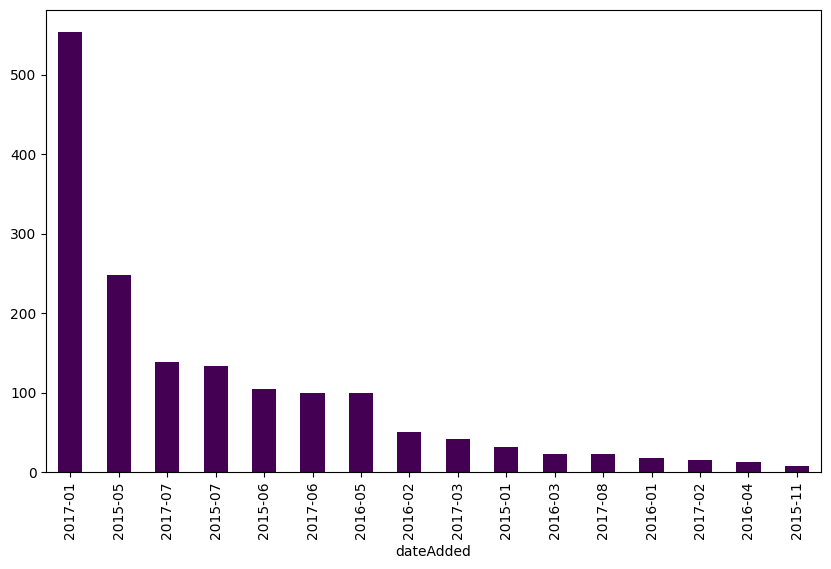

Axes(0.125,0.11;0.775x0.77)


In [18]:
df['dateAdded'] = pd.to_datetime(df['dateAdded'], errors='coerce')
reviews_per_month = df['dateAdded'].dt.to_period('M').value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()
print(reviews_per_month)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Verificar si la columna tiene datos
if 'reviews.userCity' in df.columns and not df['reviews.userCity'].empty:
    # Obtener el conteo de las ciudades
    location_counts = df['reviews.userCity'].value_counts()

    # Verificar si location_counts tiene datos
    if not location_counts.empty:
        # Generar el gráfico de barras con una paleta de colores
        location_counts.plot(
            kind="bar",
            figsize=(10, 6),
            colormap="viridis"
        )

        # Mostrar el gráfico
        plt.xlabel("Ciudad")
        plt.ylabel("Frecuencia")
        plt.title("Frecuencia de reviews por ciudad")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No hay datos en location_counts para graficar.")
else:
    print("La columna 'reviews.userCity' está vacía o no existe.")



No hay datos en location_counts para graficar.


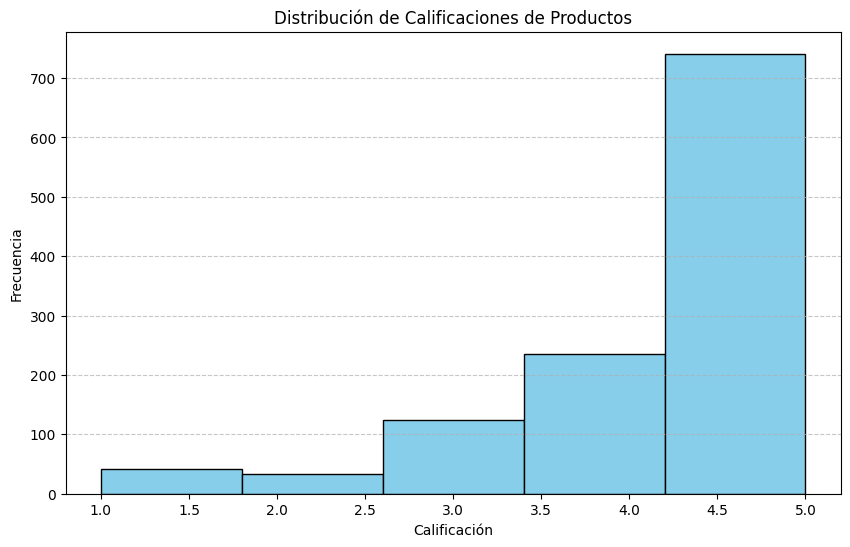

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['reviews.rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución de Calificaciones de Productos')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este histograma muestra cómo se distribuyen las calificaciones de los productos. Un pico en las calificaciones más altas podría indicar que los productos son bien recibidos, mientras que un sesgo hacia las calificaciones bajas podría señalar problemas de calidad o insatisfacción del cliente.

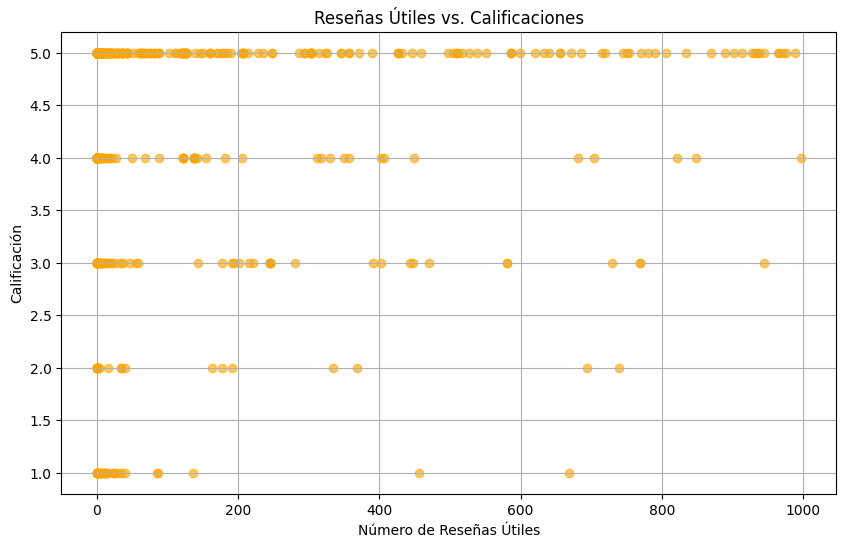

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['reviews.numHelpful'], df['reviews.rating'], alpha=0.6, color='orange')
plt.title('Reseñas Útiles vs. Calificaciones')
plt.xlabel('Número de Reseñas Útiles')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

Este gráfico de dispersión puede mostrar la relación entre el número de reseñas útiles y las calificaciones. Un patrón creciente podría sugerir que las reseñas más útiles tienden a ser también las mejor valoradas, lo que sugiere que las opiniones bien argumentadas son más valoradas por otros usuarios.

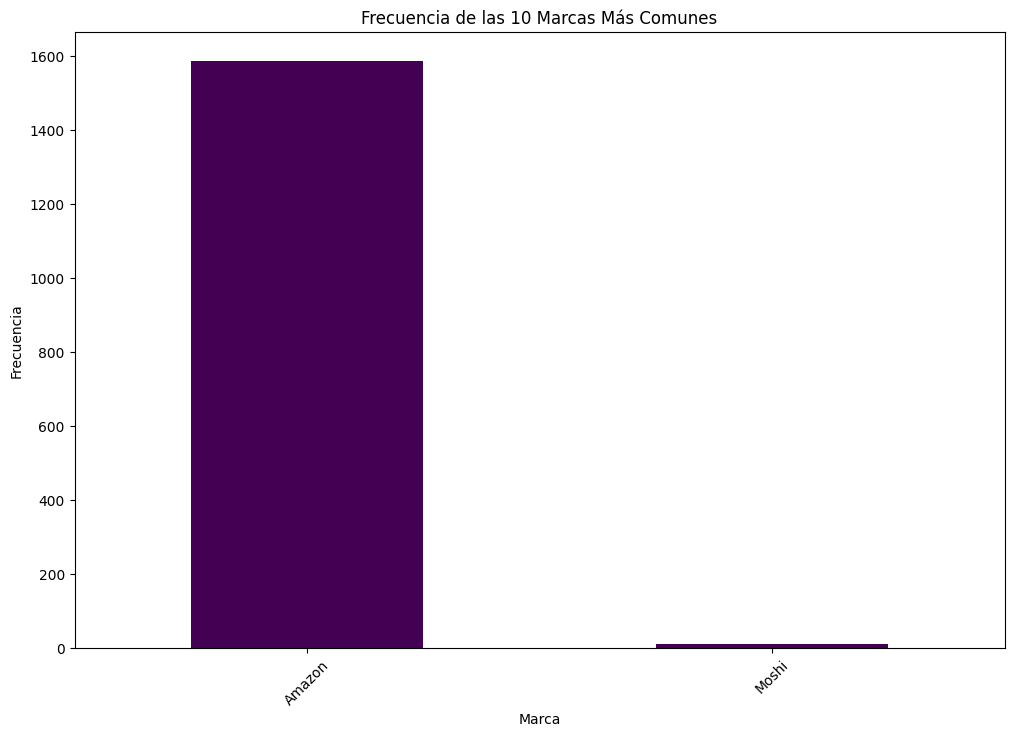

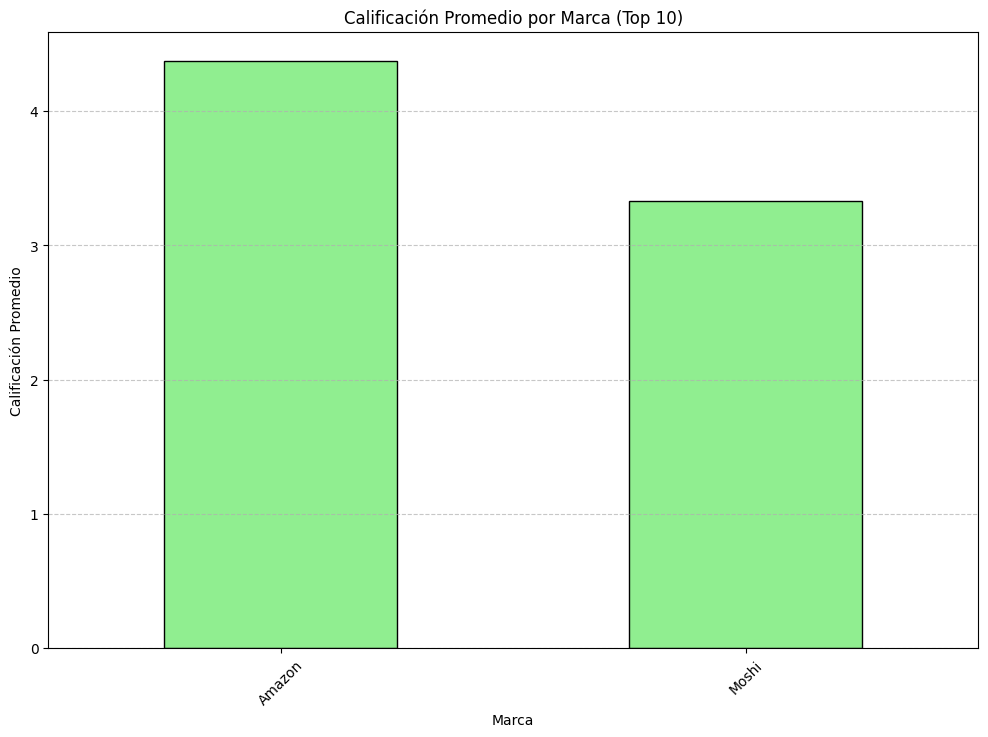

In [23]:
import matplotlib.pyplot as plt

# Seleccionar las 10 marcas más frecuentes
top_brands = df['brand'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo las 10 marcas más frecuentes
filtered_df = df[df['brand'].isin(top_brands)]

# Graficar el conteo de las 10 marcas más frecuentes
plt.figure(figsize=(12, 8))
df['brand'].value_counts().loc[top_brands].plot(kind="bar", colormap="viridis")
plt.title('Frecuencia de las 10 Marcas Más Comunes')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Calcular la calificación promedio por marca
mean_ratings = filtered_df.groupby('brand')['reviews.rating'].mean()

# Graficar la calificación promedio por marca para el Top 10
plt.figure(figsize=(12, 8))
mean_ratings.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Calificación Promedio por Marca (Top 10)')
plt.xlabel('Marca')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Este gráfico de barras permite comparar la calificación promedio de las principales marcas. Marcas con calificaciones consistentemente altas podrían ser consideradas como más confiables por los consumidores, lo que podría influir en futuras decisiones de compra.



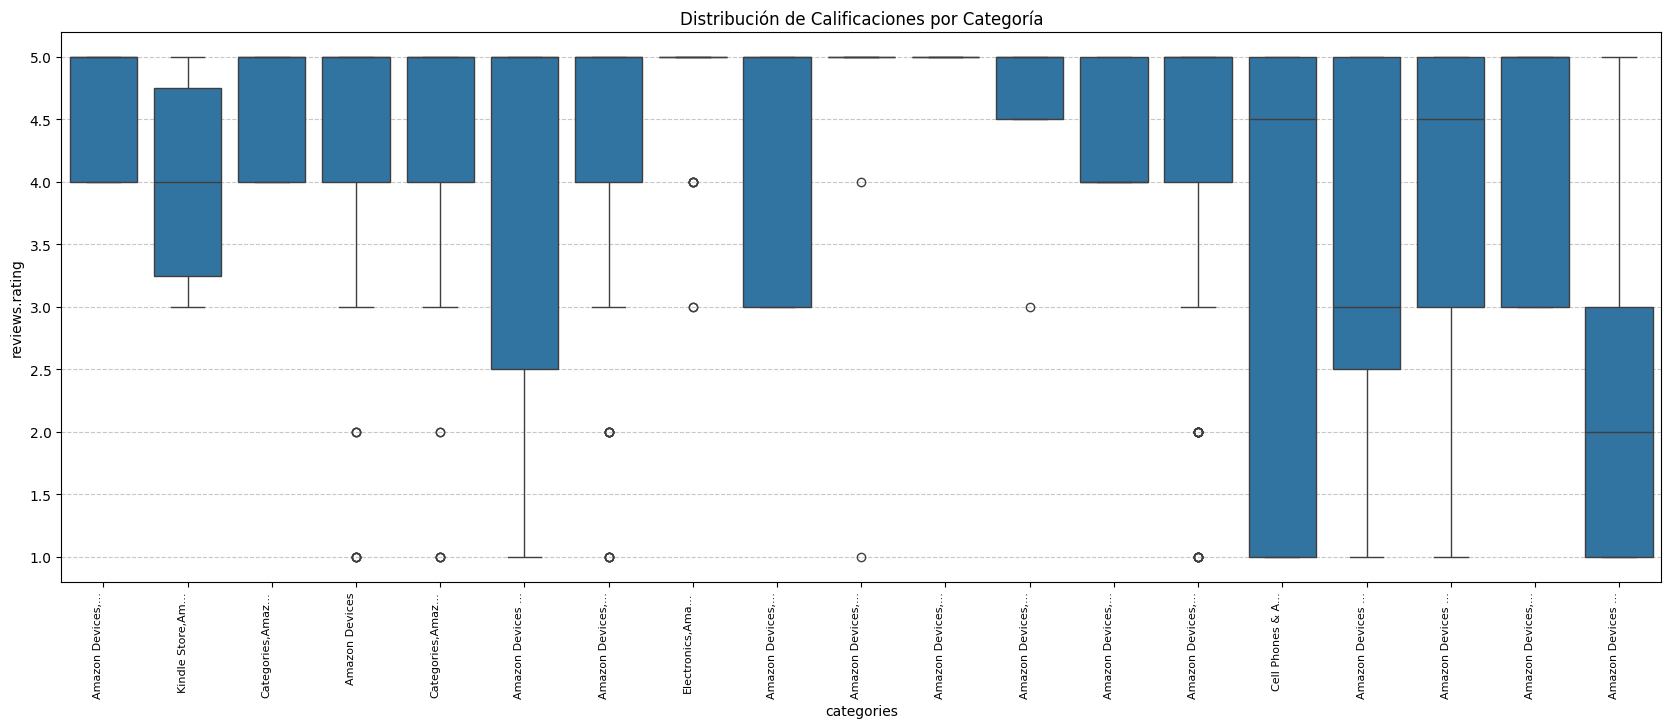

In [24]:
# Visualizar el boxplot con etiquetas abreviadas automáticamente
plt.figure(figsize=(20, 10))
sns.boxplot(x='categories', y='reviews.rating', data=df)
plt.title('Distribución de Calificaciones por Categoría')

# Abreviar etiquetas a 15 caracteres
short_labels = [label[:15] + '...' if len(label) > 15 else label for label in df['categories'].unique()]
plt.xticks(ticks=range(len(short_labels)), labels=short_labels, rotation=90, ha='right', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)
plt.show()



Este gráfico de caja muestra la distribución de calificaciones dentro de cada categoría de productos. Puede ayudar a identificar cuáles categorías tienden a recibir mejores o peores calificaciones.

<ipython-input-25-e414ea10fd03>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='reviews.doRecommend', y='reviews.rating', data=df, ci=None)


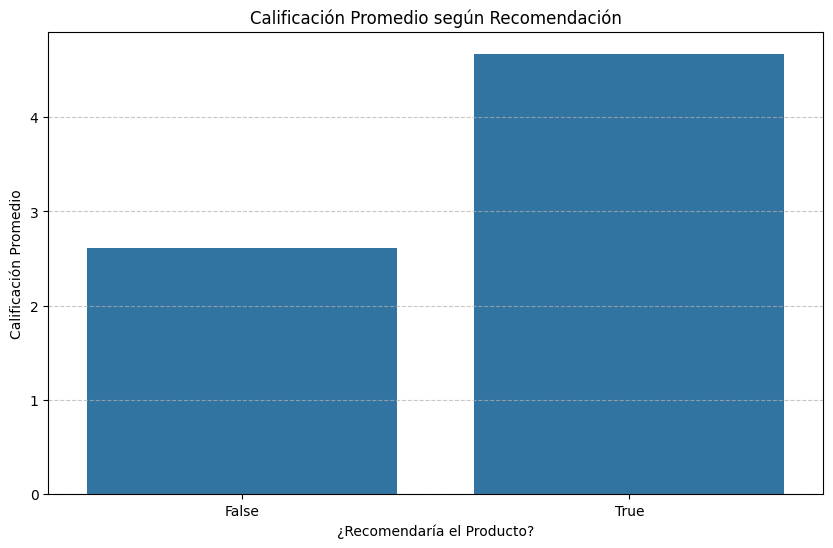

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='reviews.doRecommend', y='reviews.rating', data=df, ci=None)
plt.title('Calificación Promedio según Recomendación')
plt.xlabel('¿Recomendaría el Producto?')
plt.ylabel('Calificación Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este gráfico de barras compara las calificaciones promedio según si los usuarios recomendarían el producto. Un contraste significativo entre las dos categorías (sí/no) puede señalar la importancia de las recomendaciones en la percepción del producto.

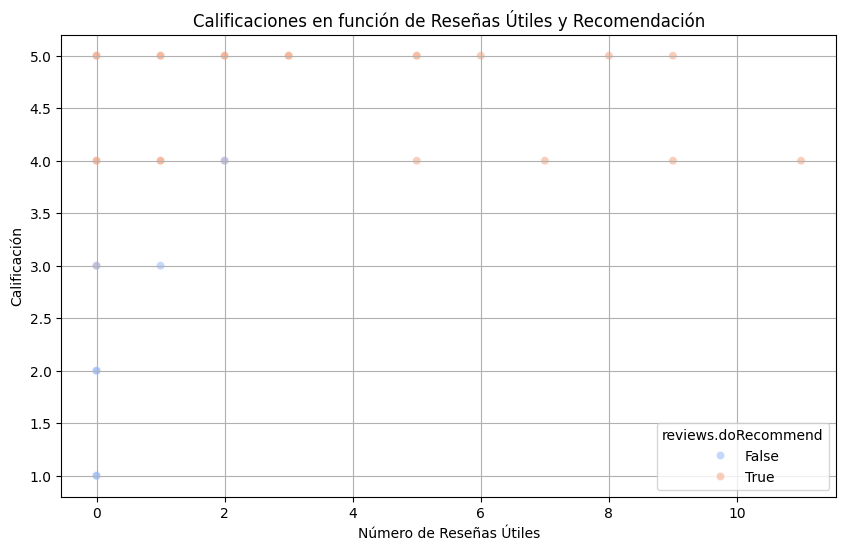

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews.numHelpful', y='reviews.rating', data=df, hue='reviews.doRecommend', palette='coolwarm', alpha=0.7)
plt.title('Calificaciones en función de Reseñas Útiles y Recomendación')
plt.xlabel('Número de Reseñas Útiles')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

Este gráfico de dispersión incluye un color (hue) para diferenciar entre las reseñas que recomiendan el producto y las que no. Esto puede ofrecer un entendimiento visual más profundo de cómo las recomendaciones afectan las calificaciones, destacando patrones de comportamiento del consumidor.

**Conclusión**:

Los gráficos generados proporcionan una visión general de cómo los usuarios perciben y evalúan productos en el dataset. Al observar las distribuciones de calificaciones, la relación entre reseñas útiles y calificaciones, y cómo se comparan diferentes marcas y categorías, puedes extraer insights valiosos que informen decisiones estratégicas en marketing y desarrollo de productos.






